# NORTHWIND DATABASE

El **objetivo** de este ejercicio es generar una serie de consultas SQL que permitan extraer información relevante de la base de datos y luego exportar los resultados para construir dashboards o visualizaciones que proporcionen insights valiosos para la toma de decisiones empresariales.

La base de datos Northwind es una base de datos de ejemplo clásica que simula las operaciones de una empresa minorista. Contiene tablas relacionales que representan diferentes aspectos del negocio, como productos, clientes, pedidos y empleados. Utilizando consultas SQL, podrás explorar y analizar estos datos para comprender mejor el desempeño del negocio en diferentes áreas.

Una vez que hayas realizado las consultas SQL y obtenido los resultados, podrás utilizarlos para herramientas de visualización de datos como Tableau, Power BI, Streamlit o cualquier otra herramienta de tu elección. 

![img](./img/northwind-er-diagram.png)

Tendrás que elegir uno de los retos a resolver:

### **1. Análisis de Ventas por Región**
Analiza las ventas de productos por región. El objetivo es identificar las regiones que generan más ingresos y las tendencias de ventas a lo largo del tiempo en esas regiones. 
Pista: Utiliza gráficos de barras y líneas para mostrar la evolución de las ventas, así como mapas geográficos para visualizar la distribución de ingresos por región.

In [3]:
import sqlite3
conn = sqlite3.connect('data/northwind.db')
c = conn.cursor();

In [4]:
c.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('Categories',),
 ('sqlite_sequence',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographics',),
 ('Customers',),
 ('Employees',),
 ('EmployeeTerritories',),
 ('Order Details',),
 ('Orders',),
 ('Products',),
 ('Regions',),
 ('Shippers',),
 ('Suppliers',),
 ('Territories',)]

In [5]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/northwind.db', echo=False)
connection = engine.connect()

In [6]:
import pandas as pd
query = """
    SELECT region, cuantos, suma_precios, 
           suma_precios * 1.0 / cuantos AS precio_promedio
    FROM (
        SELECT region, COUNT(*) AS cuantos, SUM(unitprice) AS suma_precios
        FROM products AS p
        INNER JOIN suppliers AS s ON s.supplierID = p.supplierID
        GROUP BY region
    )
    ORDER BY cuantos DESC
"""
df = pd.read_sql(query, con=connection)
df

,region,cuantos,suma_precios,precio_promedio
0,North America,16,359.70,22.481250
1,Western Europe,14,722.16,51.582857
2,British Isles,7,159.70,22.814286
3,Northern Europe,7,103.75,14.821429
4,Southern Europe,7,195.80,27.971429
5,Eastern Asia,6,182.75,30.458333
6,Scandinavia,6,114.25,19.041667
7,Victoria,5,177.85,35.570000
8,NSW,3,92.80,30.933333
9,South-East Asia,3,79.45,26.483333


C:\Users\jonol\AppData\Local\Temp\ipykernel_11860\2097710968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='region', y='precio_promedio', palette='viridis')


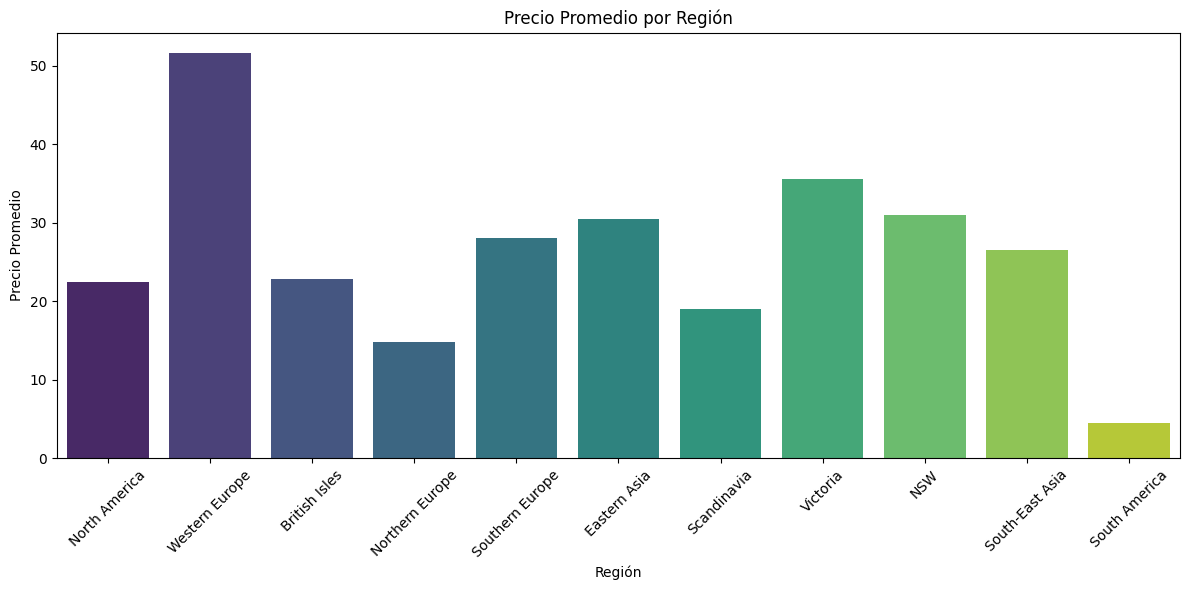

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='precio_promedio', palette='viridis')

plt.title('Precio Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **2. Análisis de Desempeño de Productos**
Analiza el desempeño de los productos de la empresa. Examina las ventas de productos por categoría, identificando los productos más vendidos y los menos vendidos. 

Pista: Utiliza gráficos de barras y de tarta para visualizar la participación de mercado de cada categoría y los ingresos generados por los productos individuales.

In [8]:
query2 = """
    SELECT 
        c.categoryName AS categoria,
        p.productName AS producto,
        SUM(od.quantity * od.unitprice) AS ingreso_total
    FROM "Order Details" AS od
    INNER JOIN products AS p ON p.productID = od.productID
    INNER JOIN categories AS c ON c.categoryID = p.categoryID
    GROUP BY c.categoryName, p.productName
    ORDER BY ingreso_total DESC
"""

df2 = pd.read_sql(query2, con=connection)
df2


,categoria,producto,ingreso_total
0,Beverages,Côte de Blaye,53274482.70
1,Meat/Poultry,Thüringer Rostbratwurst,24630836.96
2,Meat/Poultry,Mishi Kobe Niku,19424638.00
3,Confections,Sir Rodney's Marmalade,16654879.80
4,Seafood,Carnarvon Tigers,12607487.50
...,...,...,...
72,Meat/Poultry,Tourtière,1509521.85
73,Grains/Cereals,Filo Mix,1421520.80
74,Seafood,Konbu,1214882.40
75,Beverages,Guaraná Fantástica,908535.60


In [9]:
df2_categoria = df2.groupby('categoria')['ingreso_total'].sum().reset_index().sort_values(by='ingreso_total', ascending=False)
df2_categoria

,categoria,ingreso_total
0,Beverages,92181842.95
2,Confections,66347544.94
5,Meat/Poultry,64896314.41
3,Dairy Products,58034940.00
1,Condiments,55802774.45
7,Seafood,49931965.52
6,Produce,32706403.90
4,Grains/Cereals,28573512.55


C:\Users\jonol\AppData\Local\Temp\ipykernel_11860\1744703856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2_categoria, x='categoria', y='ingreso_total', palette='flare')


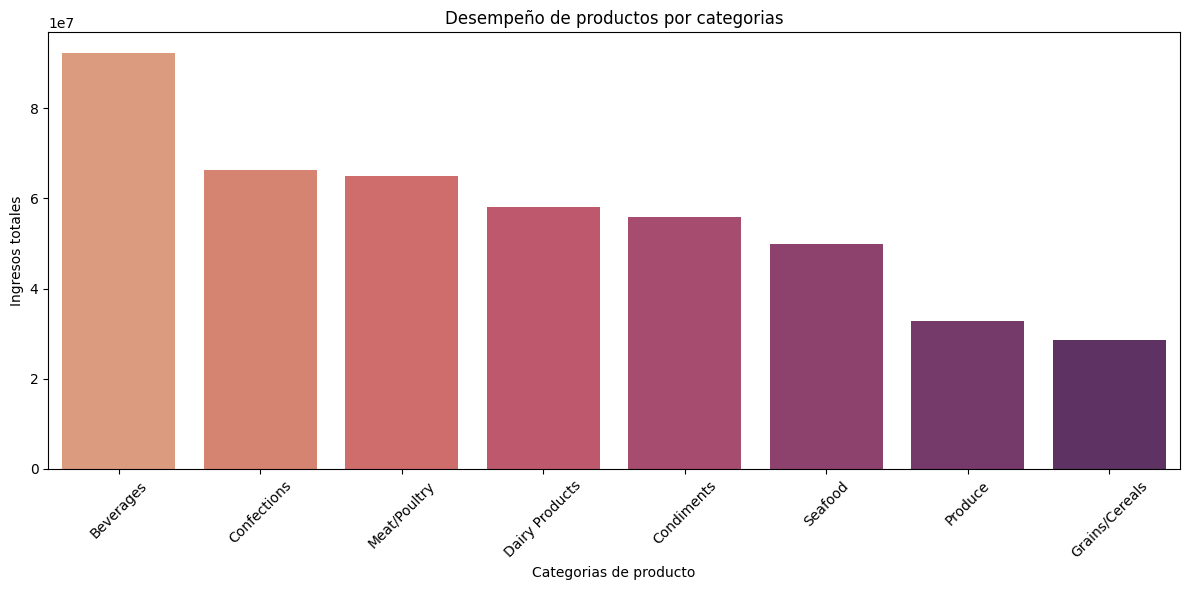

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df2_categoria, x='categoria', y='ingreso_total', palette='flare')

plt.title('Desempeño de productos por categorias')
plt.xlabel('Categorias de producto')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


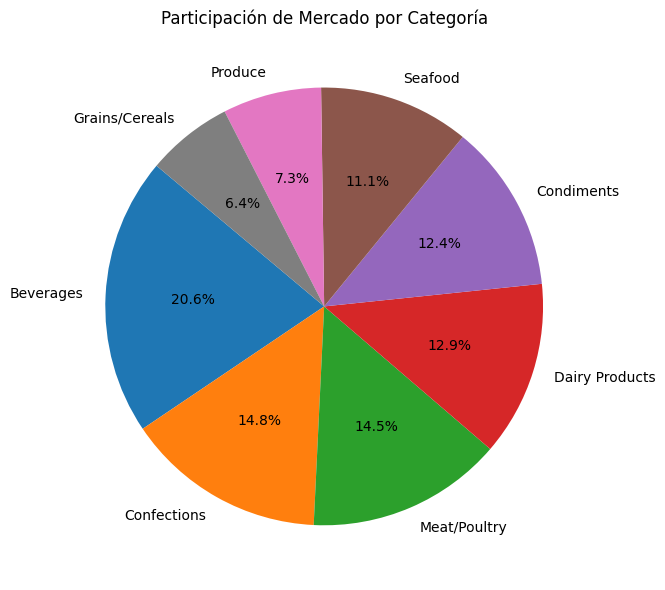

In [11]:
plt.figure(figsize=(12,6))
plt.pie(df2_categoria['ingreso_total'], labels=df2_categoria['categoria'], autopct='%1.1f%%', startangle=140)
plt.title('Participación de Mercado por Categoría')
plt.tight_layout()
plt.show()

C:\Users\jonol\AppData\Local\Temp\ipykernel_11860\134244866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='producto', y='ingreso_total', palette='mako')


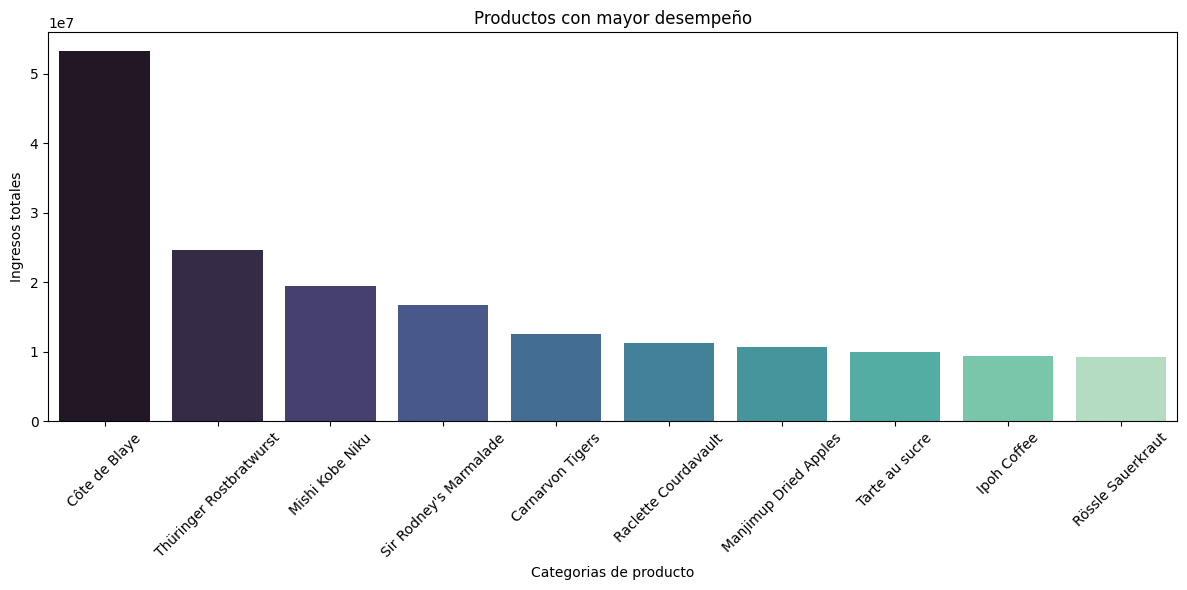

In [12]:
top_5 = df2.sort_values(by='ingreso_total', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5, x='producto', y='ingreso_total', palette='mako')

plt.title('Productos con mayor desempeño')
plt.xlabel('Categorias de producto')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jonol\AppData\Local\Temp\ipykernel_11860\3151361582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, x='producto', y='ingreso_total', palette='Spectral')


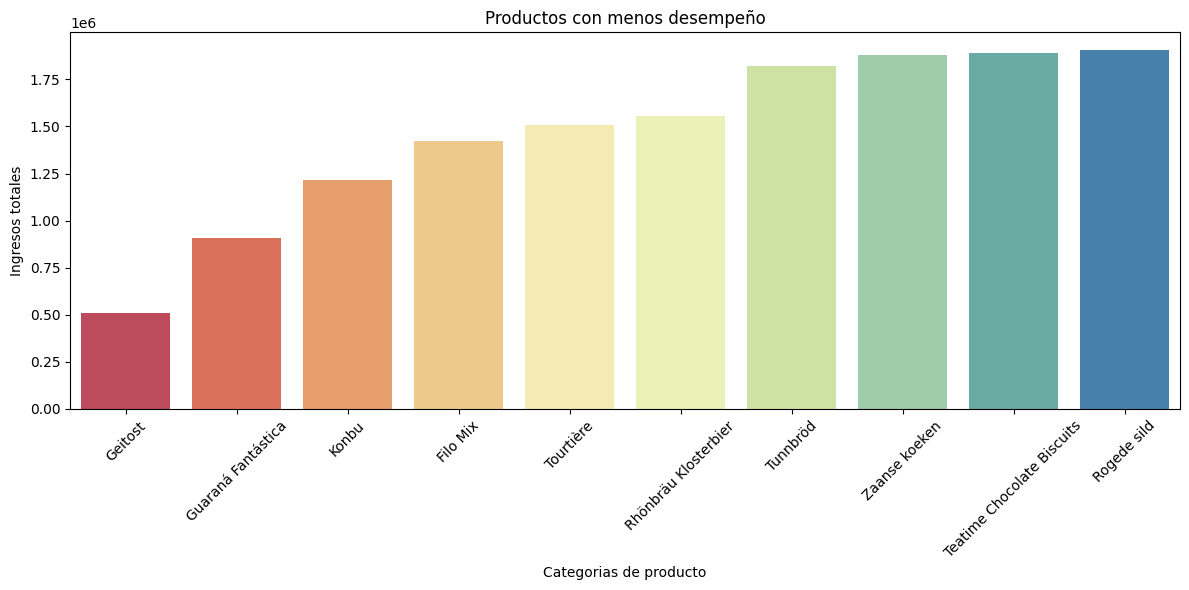

In [13]:
bottom_5 = df2.sort_values(by='ingreso_total', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_5, x='producto', y='ingreso_total', palette='Spectral')

plt.title('Productos con menos desempeño')
plt.xlabel('Categorias de producto')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **3. Análisis de Rentabilidad de Clientes**
Analiza la rentabilidad de los clientes de la empresa. Examina los ingresos generados por cada cliente, así como los costos asociados con el servicio o producto proporcionado. 

Pista: Utiliza gráficos de dispersión y tablas dinámicas para identificar los clientes más rentables y aquellos que requieren mayor atención.

In [14]:
query3 = """
SELECT 
    c.CustomerID, 
    c.CompanyName, 
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)), 2) AS beneficios_totales,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) * 0.7, 2) AS coste_estimado,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) * 0.3, 2) AS beneficio_estimado,
    COUNT(DISTINCT o.OrderID) AS numero_ordenes,
    ROUND(AVG(od.Discount), 2) AS media_descuentos
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY c.CustomerID, c.CompanyName
ORDER BY beneficio_estimado DESC;

"""

df3 = pd.read_sql_query(query3, conn)


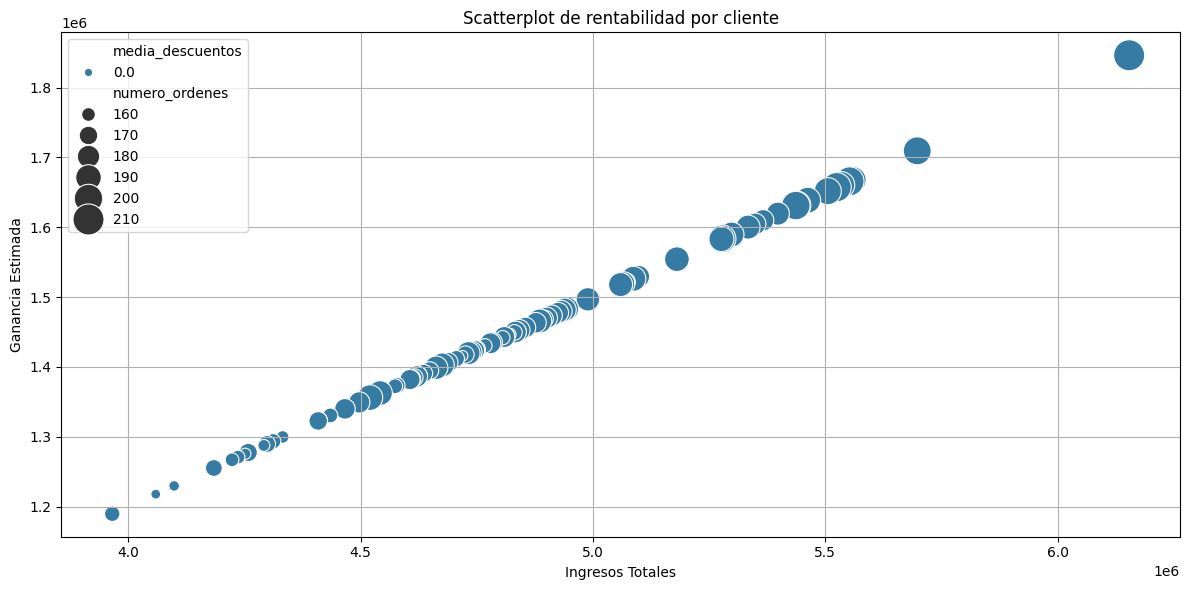

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df3,
    x='beneficios_totales',
    y='beneficio_estimado',
    size='numero_ordenes',
    hue='media_descuentos',
    sizes=(50, 500),
    palette='mako',
    legend='auto'
)

plt.title('Scatterplot de rentabilidad por cliente')
plt.xlabel('Ingresos Totales')
plt.ylabel('Ganancia Estimada')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
pivot = df3.pivot_table(
    index='CompanyName',
    values=['beneficios_totales', 'coste_estimado', 'beneficio_estimado', 'numero_ordenes', 'media_descuentos']
).sort_values(by='beneficio_estimado', ascending=False)

display(pivot.head(10))

,beneficio_estimado,beneficios_totales,coste_estimado,media_descuentos,numero_ordenes
CompanyName,,,,,
B's Beverages,1846234.60,6154115.34,4307880.74,0.0,210.0
Hungry Coyote Import Store,1709407.10,5698023.67,3988616.57,0.0,198.0
Rancho grande,1667733.02,5559110.08,3891377.06,0.0,194.0
Gourmet Lanchonetes,1665692.94,5552309.80,3886616.86,0.0,202.0
Ana Trujillo Emparedados y helados,1660307.00,5534356.65,3874049.65,0.0,195.0
Ricardo Adocicados,1657355.19,5524517.31,3867162.12,0.0,203.0
Folies gourmandes,1651650.85,5505502.85,3853851.99,0.0,195.0
Let's Stop N Shop,1638659.41,5462198.02,3823538.62,0.0,191.0
LILA-Supermercado,1631231.50,5437438.34,3806206.84,0.0,203.0


### **4. Análisis de Inventarios y Proveedores**
Analiza los niveles de inventario y la gestión de proveedores de la empresa. Examina el inventario disponible por categoría de productos, así como el rendimiento de los proveedores en términos de puntualidad de entrega y calidad de los productos. 

Pista: Utiliza gráficos de líneas y tablas dinámicas para mostrar tendencias y comparar el desempeño de los proveedores.

In [18]:
query4_1 = """
SELECT
    cat.CategoryName,
    SUM(p.UnitsInStock) AS stock_total,
    SUM(p.UnitsOnOrder) AS unidades_pedido
FROM Products p
JOIN Categories cat on p.CategoryID = cat.CategoryID
GROUP BY cat.CategoryName
ORDER BY stock_total DESC;
"""

df4_1 = pd.read_sql_query(query4_1, conn)

<Figure size 1200x600 with 0 Axes>

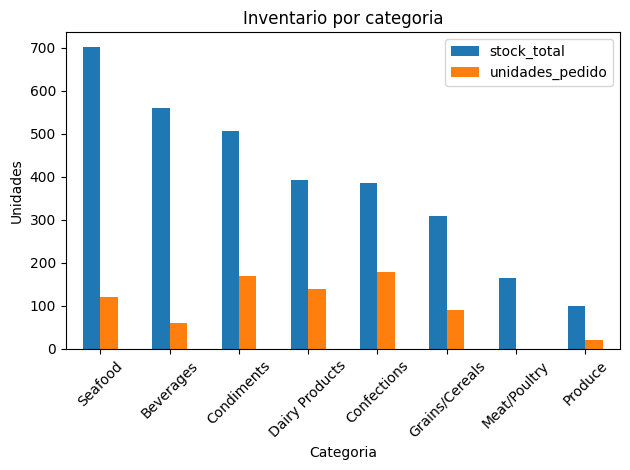

In [19]:
plt.figure(figsize=(12, 6))
df4_1.set_index('CategoryName')[['stock_total','unidades_pedido']].plot(kind='bar', stacked=False)
plt.title('Inventario por categoria')
plt.xlabel('Categoria')
plt.ylabel('Unidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
query4_2 = """
SELECT
    s.SupplierID,
    s.CompanyName,
    AVG(JULIANDAY(o.ShippedDate) - JULIANDAY(o.OrderDate)) AS tiempo_medio_entrega
FROM Suppliers s
JOIN Products p ON s.SupplierID = p.SupplierID
JOIN [Order Details] od ON p.ProductID = od.ProductID
JOIN Orders o ON od.OrderID = o.OrderID
WHERE o.ShippedDate IS NOT NULL AND o.OrderDate IS NOT NULL
GROUP BY s.SupplierID, s.CompanyName
ORDER BY tiempo_medio_entrega;
"""
df4_2 = pd.read_sql_query(query4_2, conn)

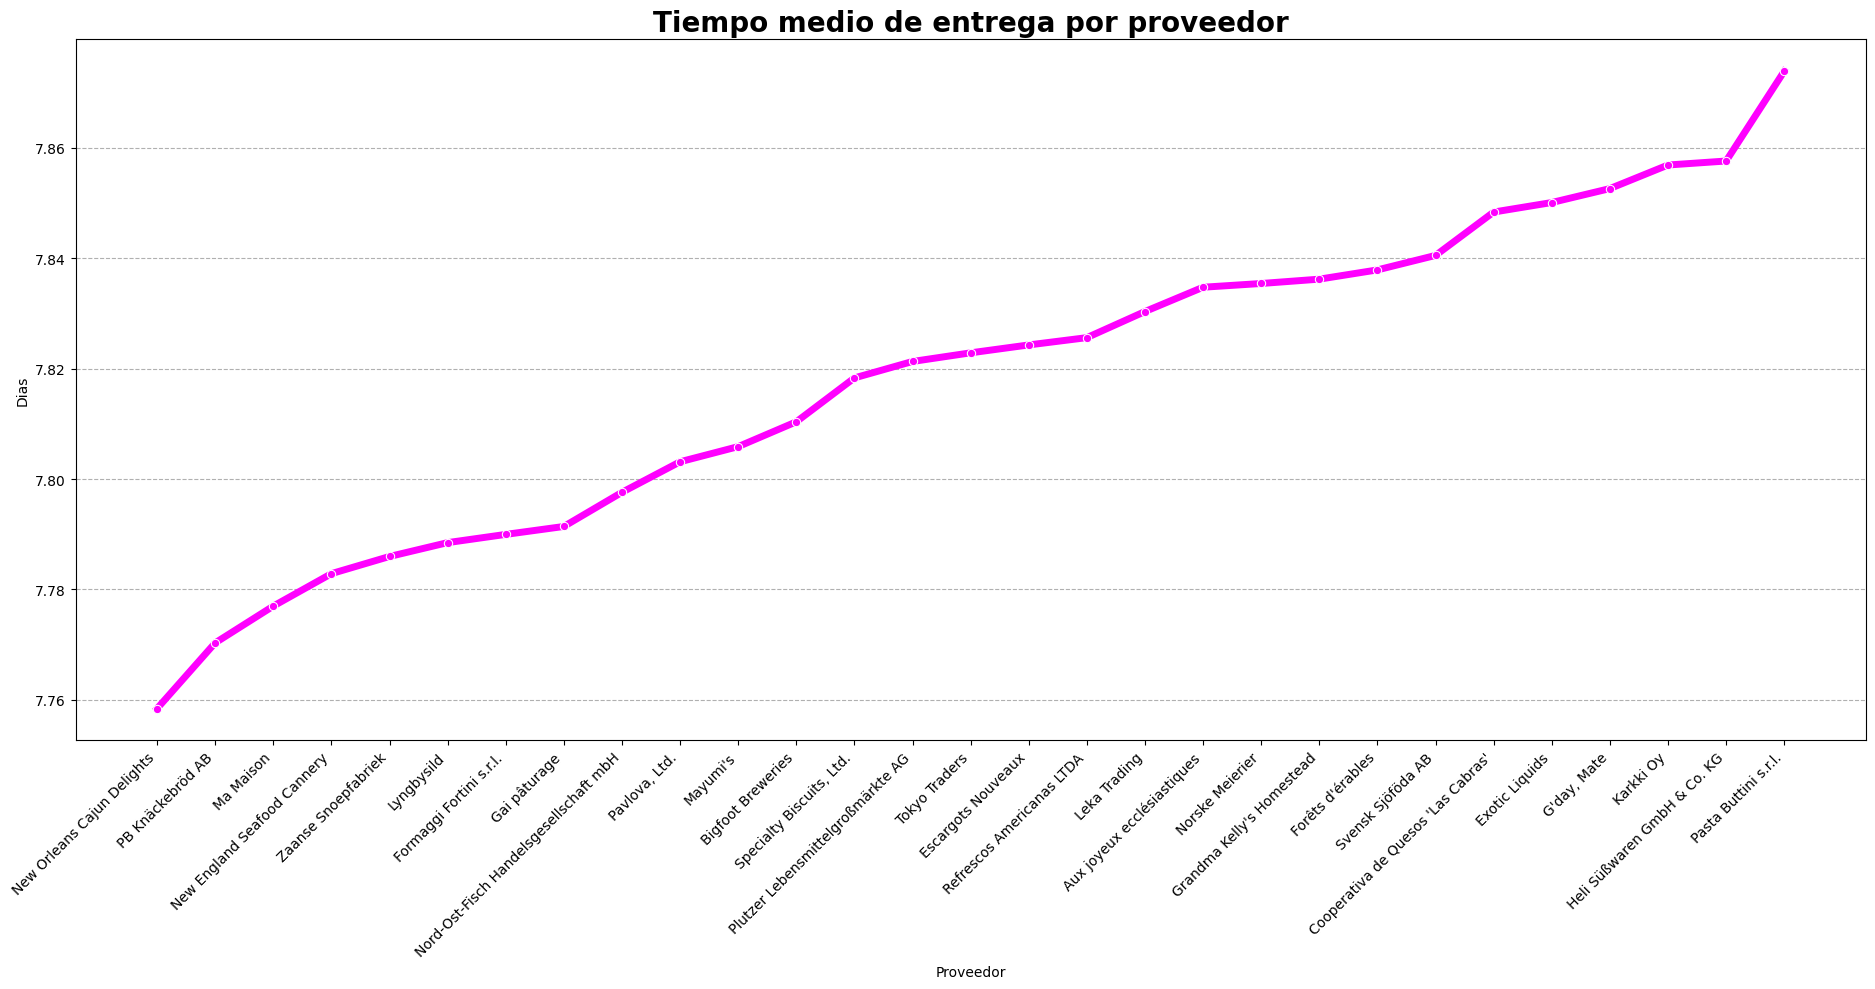

In [21]:

plt.figure(figsize=(19, 10))
df4_2 = df4_2.sort_values('tiempo_medio_entrega')
sns.lineplot(data=df4_2, x='CompanyName', y='tiempo_medio_entrega', marker='o', color='#FF00FF', linewidth=5)
plt.title('Tiempo medio de entrega por proveedor', fontsize=20, weight='bold')
plt.grid(axis='y', which='major', linestyle='--', alpha=1)
plt.xlabel('Proveedor')
plt.ylabel('Dias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### **5. Análisis de Comportamiento de Empleados**
Analiza el comportamiento de los empleados de la empresa. Examina las ventas realizadas por cada empleado, así como su eficiencia en el manejo de pedidos y su puntualidad en la entrega de productos. 

Pista: Utiliza gráficos de barra y de dispersión para comparar el desempeño de los empleados y identificar áreas de mejora.

In [26]:
query5_1 = """
SELECT
    e.EmployeeID,
    e.FirstName ||' '|| e.LastName AS nombre_empleado,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)), 2) AS ventas_totales
FROM Employees e
JOIN Orders o ON e.EmployeeID = o.EmployeeID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY e.EmployeeID
ORDER BY ventas_totales DESC;
"""

df5_1 = pd.read_sql_query(query5_1, conn)

C:\Users\jonol\AppData\Local\Temp\ipykernel_11860\2395421654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df5_1, x='ventas_totales', y='nombre_empleado', palette='rocket')


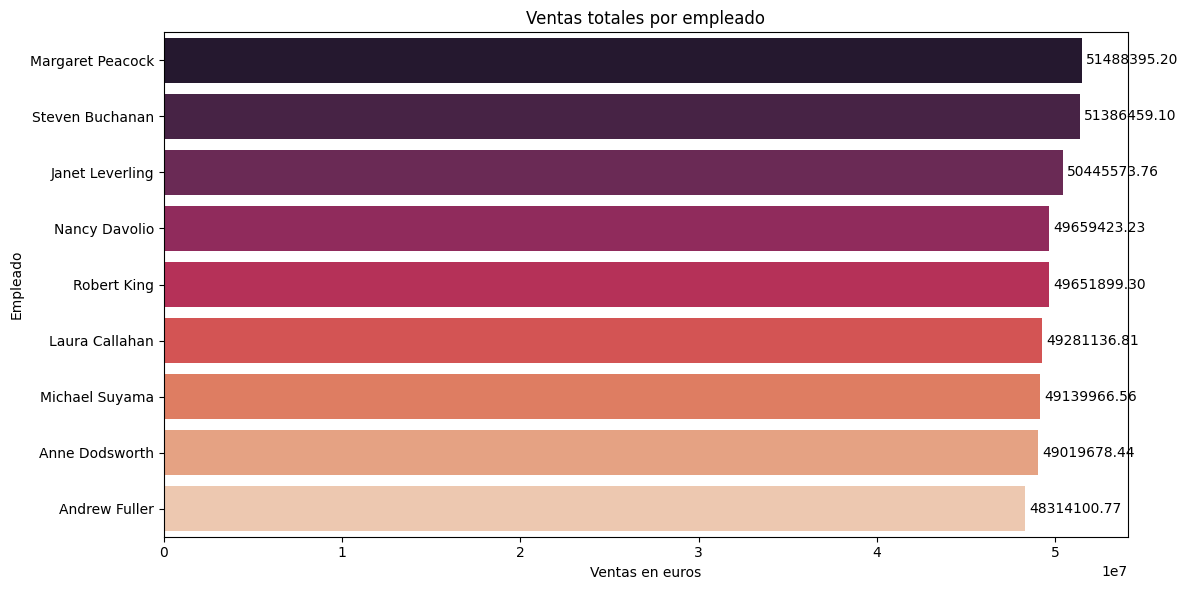

In [39]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df5_1, x='ventas_totales', y='nombre_empleado', palette='rocket')
plt.title("Ventas totales por empleado")
plt.xlabel("Ventas en euros")
plt.ylabel("Empleado")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

In [37]:
query5_2 = """
SELECT
    e.EmployeeID,
    e.FirstName ||' '|| e.LastName AS nombre_empleado,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)), 2) AS ventas_totales,
    ROUND(AVG(JULIANDAY(o.ShippedDate) - JULIANDAY(o.OrderDate)),2) AS tiempo_medio_retrasos,
    COUNT(DISTINCT o.OrderID) AS pedidos_procesados
FROM Employees e
JOIN Orders o ON e.EmployeeID = o.EmployeeID
JOIN [Order Details] od ON o.OrderID = od.OrderID
WHERE o.ShippedDate IS NOT NULL AND o.OrderDate IS NOT NULL
GROUP BY e.EmployeeID
"""

df5_2 = pd.read_sql_query(query5_2, conn)

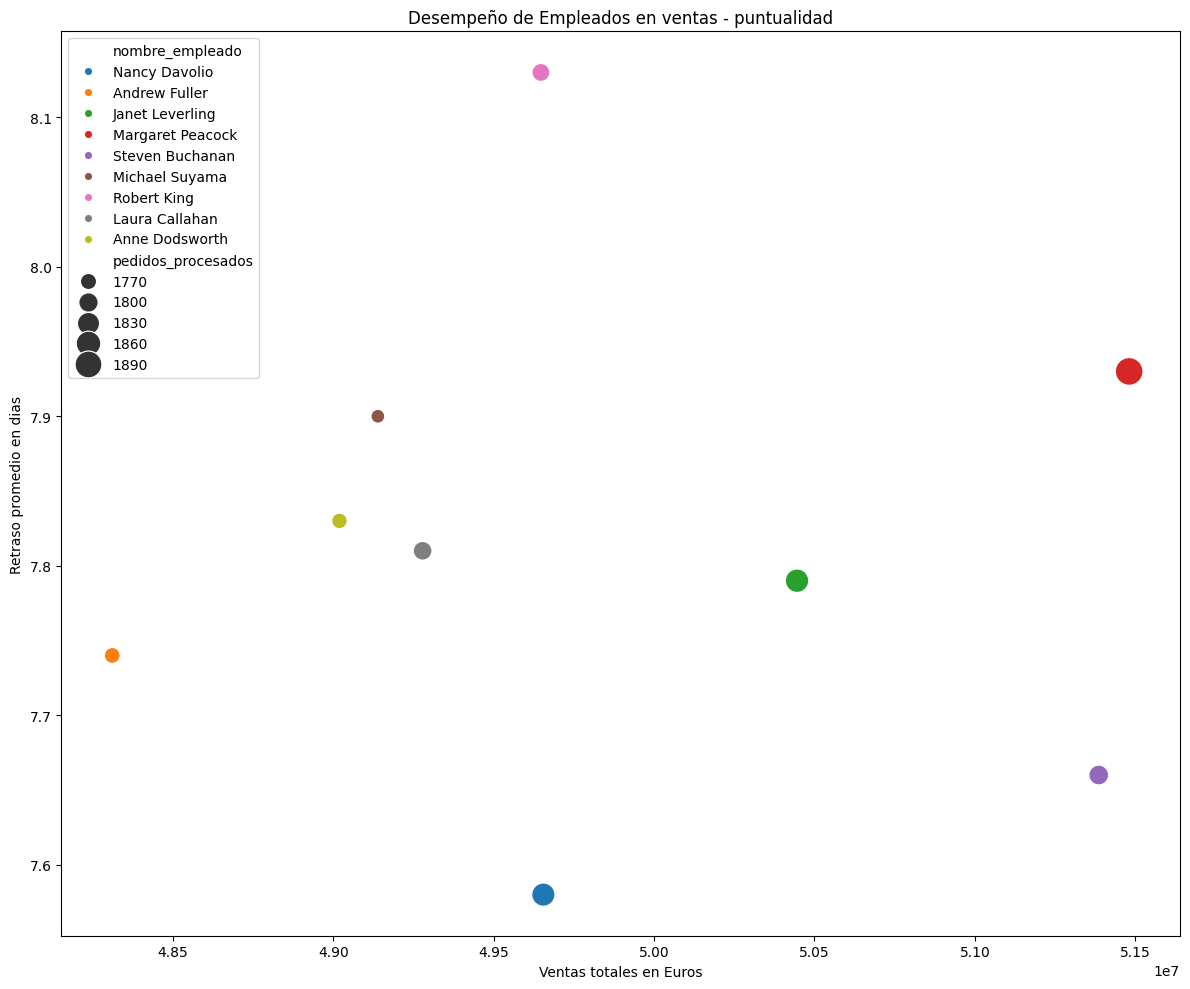

In [45]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df5_2, x='ventas_totales', y='tiempo_medio_retrasos', size='pedidos_procesados', hue='nombre_empleado', palette='tab10', sizes=(100,400), legend=True)
plt.title('Desempeño de Empleados en ventas - puntualidad')
plt.xlabel('Ventas totales en Euros')
plt.ylabel('Retraso promedio en dias')
plt.tight_layout()
plt.show()

Los empleados más eficientes aparecen en la parte inferior derecha (altas ventas, bajo retraso). Los menos eficientes se concentran en la parte superior izquierda.